# Topic 1 - Linear Regression with one feature onlyy

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [6]:
df = pd.read_csv("canada_per_capita_income.csv")

In [7]:
df.head(3)
df.shape

(47, 2)

In [8]:
df = df.rename(columns={"per capita income (US$)":"per_capita_income"})

In [9]:
Linear_Regression = linear_model.LinearRegression()

In [10]:
mean = df.year.mean()
mean

1993.0

In [11]:
Linear_Regression.fit(df[["year"]],df["per_capita_income"])

LinearRegression()

In [12]:
b=[]
for i in df.year:
    a = i - mean
    b.append(a)
df["year-mean(year)"]=b

In [13]:
mean_2 = df.per_capita_income.mean()
print(mean_2)
c=[]
for i in df.per_capita_income:
    d = i - mean_2
    c.append(d)
df["per_capita_income-mean(per_capita_income)"]=c
df.head(3)

18920.137063404254


,year,per_capita_income,year-mean(year),per_capita_income-mean(per_capita_income)
0,1970,3399.299037,-23.0,-15520.838026
1,1971,3768.297935,-22.0,-15151.839128
2,1972,4251.175484,-21.0,-14668.961579


In [14]:
df["(year-mean(year))^2"] = df["year-mean(year)"]*df["year-mean(year)"]
df["(year-mean(year))*per_capita_income-mean(per_capita_income)"] = df["year-mean(year)"]*df["per_capita_income-mean(per_capita_income)"]
df.head(3)

,year,per_capita_income,year-mean(year),per_capita_income-mean(per_capita_income),(year-mean(year))^2,(year-mean(year))*per_capita_income-mean(per_capita_income)
0,1970,3399.299037,-23.0,-15520.838026,529.0,356979.274607
1,1971,3768.297935,-22.0,-15151.839128,484.0,333340.460825
2,1972,4251.175484,-21.0,-14668.961579,441.0,308048.193167


In [15]:
b1 = df["(year-mean(year))*per_capita_income-mean(per_capita_income)"].sum()/df["(year-mean(year))^2"].sum()
b1

828.4650752227103

In [16]:
b0= (mean_2 - b1)/mean 
b0

9.077607620763445

In [17]:
(9.077607620763445*2025)+828.4650752227105

19210.620507268686

In [18]:
Linear_Regression.predict([[2025]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45431.01947053])

In [19]:
Linear_Regression.coef_

array([828.46507522])

In [20]:
Linear_Regression.intercept_

-1632210.7578554575

In [21]:
2025*539.0596405

1091595.7720125

In [22]:
1091595.7720125-1058665.6610086

32930.11100390018

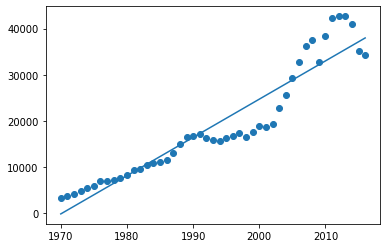

In [23]:
import matplotlib.pyplot as plt
plt.scatter(df.year,df.per_capita_income)
plt.plot(df.year,Linear_Regression.predict(df[["year"]]))

In [24]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
LR = linear_model.LinearRegression()

LR.fit(df[["year"]],df["per_capita_income"])

X = df["year"]
y= df["per_capita_income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

predict = LR.predict([[2022]])
predict

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([42945.62424486])

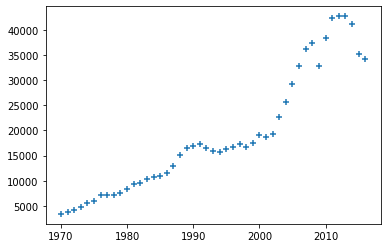

In [25]:
plt.scatter(df.year,df.per_capita_income,marker="+")

In [26]:
df1 = pd.DataFrame({"year":[2022,2023,2025]})

In [27]:
df1

,year
0,2022
1,2023
2,2025


In [28]:
predict1 = LR.predict(df1[["year"]])

In [29]:
predict1

array([42945.62424486, 43774.08932009, 45431.01947053])

In [30]:
#conclusion - 
#1. column add at the last of dataframe - we use INSERT(INDEX,"COLUMNNAME",VALUE)
#2. to plot - scatter is used plt.scatter(df.column1,df.column2)

# -------------------------------------------------------------------------------------------

# Topic 2 - Linear Regression with more number of features 

In [31]:
df = pd.read_csv("hiring.csv")

In [32]:
df.head(2)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000


In [33]:
df["test_score(out of 10)"]=df["test_score(out of 10)"].fillna(df["test_score(out of 10)"].median())

In [34]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [35]:
df["experience"]=df["experience"].fillna("zero")

In [36]:
from word2number import w2n
df["experience"]=df["experience"].apply(w2n.word_to_num)

In [37]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


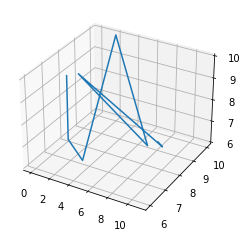

In [43]:
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
ax.plot3D(df.experience,df["test_score(out of 10)"],df["interview_score(out of 10)"])
#3D_Plot

In [393]:
from sklearn import linear_model
LR1 = linear_model.LinearRegression()
LR1.fit(df[["experience","test_score(out of 10)","interview_score(out of 10)"]],df["salary($)"])

LinearRegression()

In [394]:
LR1.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [395]:
LR1.intercept_

17737.263464337695

In [396]:
#y = m1x1+m2x2+m3x3 + c

In [397]:
LR1.predict([[8,9,9]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([76699.41775837])

In [399]:
#tocheck 

(8*2812.95487627)+(9*1845.70596798)+(9*2205.24017467)+17737.263464337695

76699.4177583477